In [122]:
import torch
from torch import nn
from torch.distributions import Normal
from torchvision import transforms
import torchvision
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torchvision.utils as vutils
from tqdm import tqdm
import numpy as np

In [13]:
class Encoder(nn.Module):
    def __init__(self, in_features, latent_dim, layers, bias = True):
        super(Encoder, self).__init__()
        inSize = in_features
        modules = []
        for x in layers:
            modules.append(nn.Linear(inSize,x,bias = bias))
            modules.append(nn.ReLU())
            inSize = x
        modules.append(nn.Linear(inSize, 2*latent_dim))
        self.model = nn.Sequential(*modules)
            
    def forward(self, input):
        mu, logsigma = self.model(input).chunk(2, dim = -1)
        return mu, logsigma

class Decoder(nn.Module):
    def __init__(self, in_features, latent_dim, layers, bias = True):
        super(Decoder, self).__init__()
        inSize = latent_dim
        modules = []
        for x in layers:
            modules.append(nn.Linear(inSize,x,bias = bias))
            modules.append(nn.ReLU())
            inSize = x
        modules.append(nn.Linear(inSize, in_features))
        modules.append(nn.Sigmoid())
        self.model = nn.Sequential(*modules)
        
    def forward(self, z):
        return self.model(z)

In [129]:
class VAE(nn.Module):
    def __init__(self,in_features, latent_dim = 32, layers = [512,256,128,64], bias = True):
        super(VAE,self).__init__()
        self.encoder = Encoder(in_features, latent_dim, layers, bias = True)
        self.decoder = Decoder(in_features, latent_dim, reversed(layers), bias = True)
    
    def forward(self, input):
        input = input.flatten(start_dim = 1)
        mu, logsigma = self.encoder(input)
        std = torch.exp(0.5 * logsigma)
        z = Normal(mu,std).rsample()
        output = self.decoder(z)
        return output, input, mu, logsigma

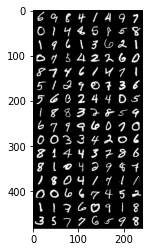

In [42]:
batch_size = 128
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_workers = 2 if device =='cuda' else 0
dataset = torchvision.datasets.MNIST(root = './data', download = True, transform = transforms.Compose([transforms.Grayscale(),
                                                                                                       transforms.ToTensor()
                                                                                                      ]))
                                                                                     

dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

real_batch, labels = next(iter(dataloader))
plt.imshow(transforms.ToPILImage()(make_grid(real_batch)))

it: 0; loss: 553.4527587890625 : : 0it [00:00, ?it/s]

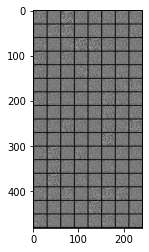

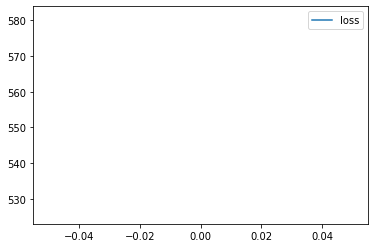

it: 468; loss: 174.41737365722656 : : 469it [00:05, 93.23it/s]
it: 469; loss: 178.28245544433594 : : 0it [00:00, ?it/s]

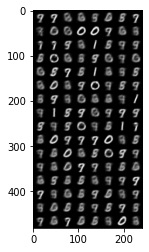

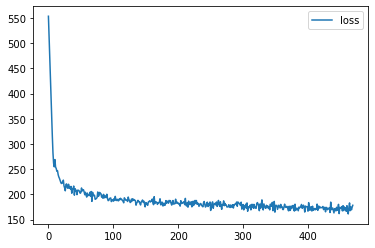

it: 937; loss: 157.7404327392578 : : 469it [00:04, 94.71it/s]  
it: 938; loss: 173.09254455566406 : : 0it [00:00, ?it/s]

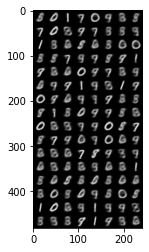

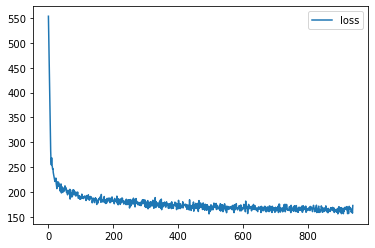

it: 1406; loss: 162.77685546875 : : 469it [00:04, 97.30it/s]    
it: 1407; loss: 165.39877319335938 : : 0it [00:00, ?it/s]

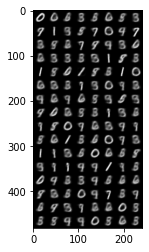

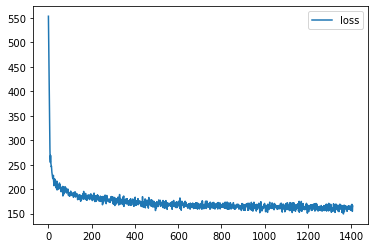

it: 1875; loss: 157.2100067138672 : : 469it [00:04, 95.07it/s]  
it: 1876; loss: 163.337646484375 : : 0it [00:00, ?it/s]

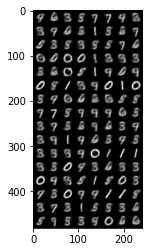

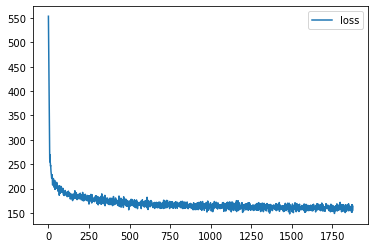

it: 2344; loss: 164.97415161132812 : : 469it [00:04, 95.75it/s] 
it: 2345; loss: 153.47085571289062 : : 0it [00:00, ?it/s]

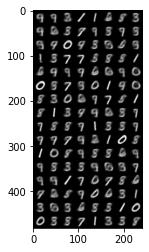

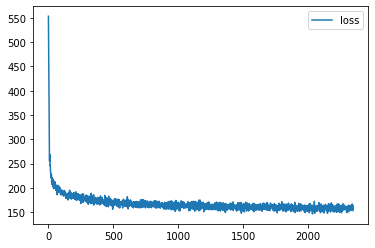

it: 2813; loss: 158.1986083984375 : : 469it [00:04, 96.76it/s]  
it: 2814; loss: 157.01809692382812 : : 0it [00:00, ?it/s]

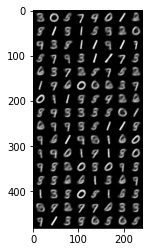

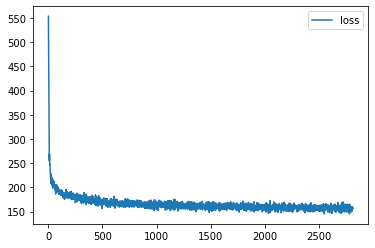

it: 3282; loss: 157.09515380859375 : : 469it [00:04, 94.28it/s]
it: 3283; loss: 153.0096435546875 : : 0it [00:00, ?it/s]

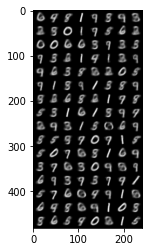

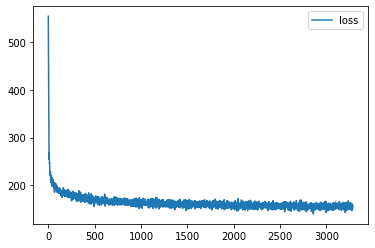

it: 3751; loss: 157.04409790039062 : : 469it [00:04, 94.36it/s] 
it: 3752; loss: 150.83941650390625 : : 0it [00:00, ?it/s]

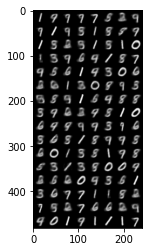

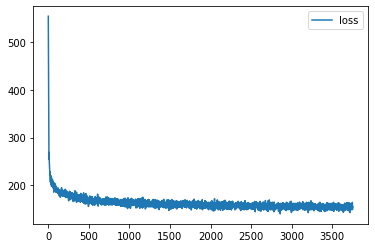

it: 4220; loss: 160.3972625732422 : : 469it [00:05, 91.46it/s] 
it: 4221; loss: 157.40097045898438 : : 0it [00:00, ?it/s]

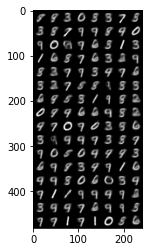

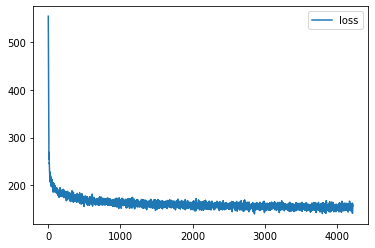

it: 4689; loss: 155.0711212158203 : : 469it [00:04, 94.97it/s]  
it: 4690; loss: 154.46128845214844 : : 0it [00:00, ?it/s]

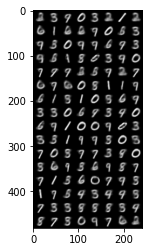

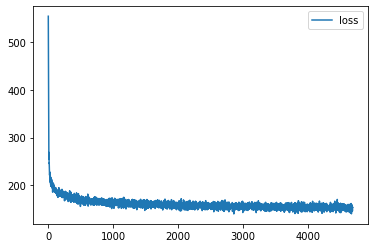

it: 5158; loss: 151.32037353515625 : : 469it [00:05, 93.68it/s]
it: 5159; loss: 158.6299285888672 : : 0it [00:00, ?it/s]

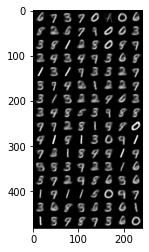

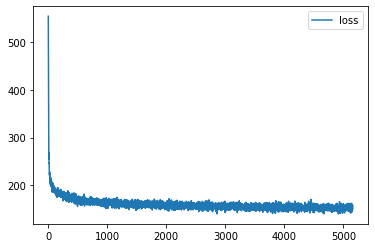

it: 5627; loss: 145.68846130371094 : : 469it [00:05, 92.50it/s]
it: 5628; loss: 156.49295043945312 : : 0it [00:00, ?it/s]

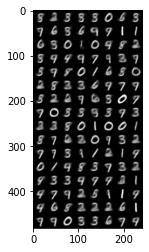

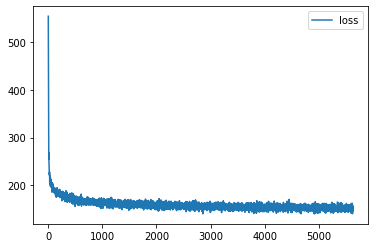

it: 6096; loss: 161.88148498535156 : : 469it [00:04, 94.81it/s]
it: 6097; loss: 154.25791931152344 : : 0it [00:00, ?it/s]

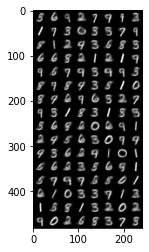

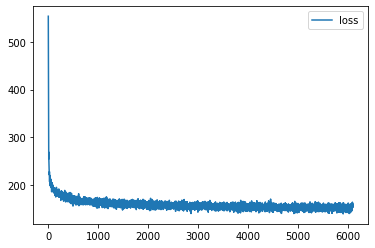

it: 6565; loss: 150.1510009765625 : : 469it [00:04, 94.17it/s] 
it: 6566; loss: 154.10287475585938 : : 0it [00:00, ?it/s]

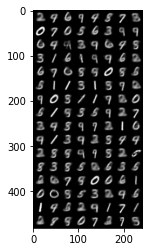

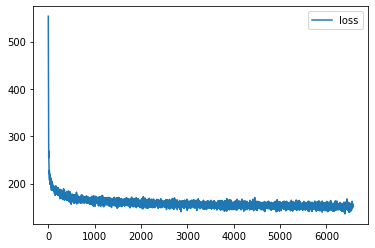

it: 7034; loss: 147.76235961914062 : : 469it [00:05, 92.79it/s]
it: 7035; loss: 152.63401794433594 : : 0it [00:00, ?it/s]

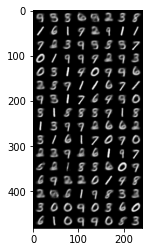

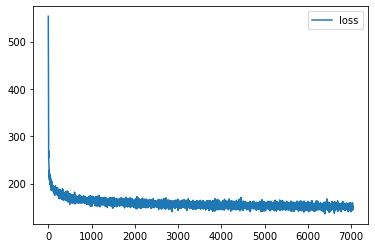

it: 7503; loss: 143.80911254882812 : : 469it [00:04, 94.60it/s] 
it: 7504; loss: 149.4657440185547 : : 0it [00:00, ?it/s]

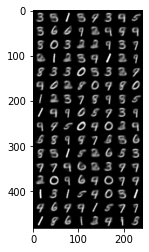

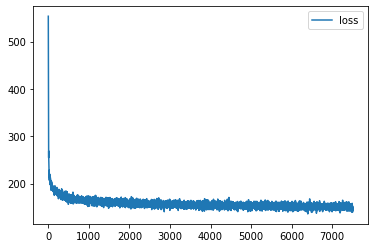

it: 7972; loss: 160.63140869140625 : : 469it [00:04, 96.62it/s] 
it: 7973; loss: 149.46682739257812 : : 0it [00:00, ?it/s]

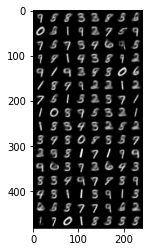

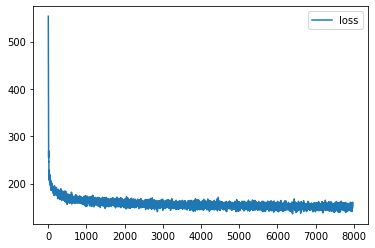

it: 8441; loss: 147.89637756347656 : : 469it [00:04, 96.26it/s] 
it: 8442; loss: 149.69882202148438 : : 0it [00:00, ?it/s]

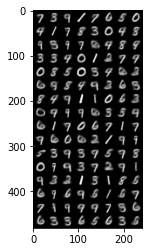

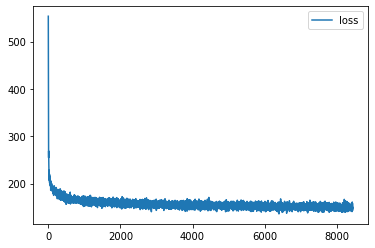

it: 8910; loss: 140.7653350830078 : : 469it [00:05, 93.43it/s] 
it: 8911; loss: 152.3185577392578 : : 0it [00:00, ?it/s]

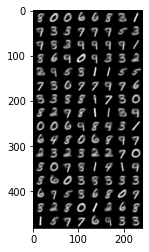

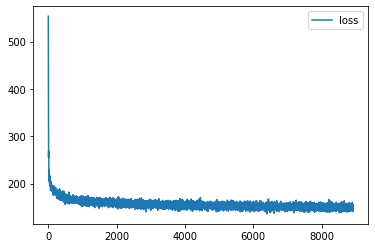

it: 9379; loss: 151.362548828125 : : 469it [00:04, 94.26it/s]  
it: 9380; loss: 146.50665283203125 : : 0it [00:00, ?it/s]

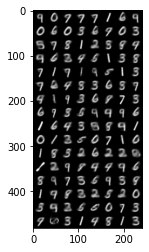

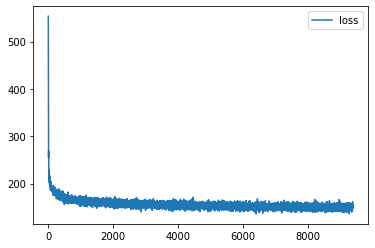

it: 9848; loss: 151.17282104492188 : : 469it [00:04, 93.95it/s]
it: 9849; loss: 151.44366455078125 : : 0it [00:00, ?it/s]

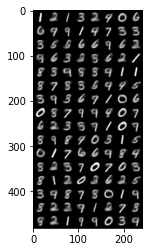

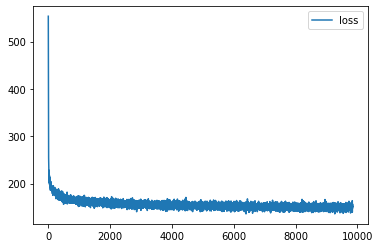

it: 10317; loss: 138.65145874023438 : : 469it [00:04, 95.21it/s]
it: 10318; loss: 148.2130126953125 : : 0it [00:00, ?it/s]

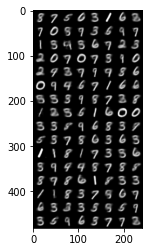

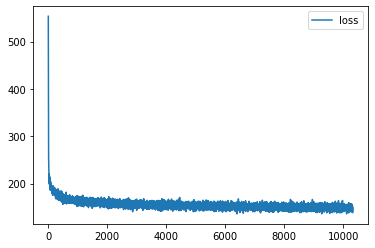

it: 10786; loss: 147.36135864257812 : : 469it [00:05, 92.33it/s]
it: 10787; loss: 144.9778289794922 : : 0it [00:00, ?it/s]

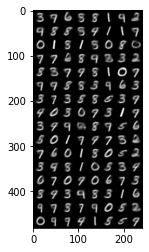

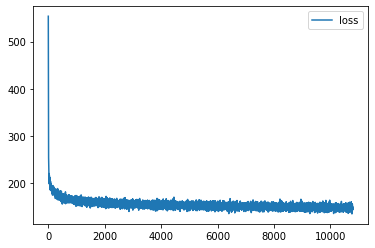

it: 11255; loss: 143.34169006347656 : : 469it [00:05, 90.43it/s]
it: 11256; loss: 154.0155029296875 : : 0it [00:00, ?it/s]

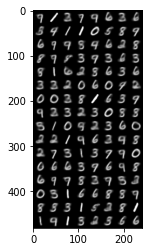

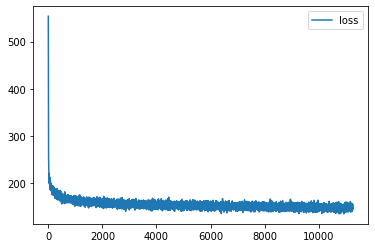

it: 11724; loss: 157.00770568847656 : : 469it [00:05, 92.00it/s]
it: 11725; loss: 148.36463928222656 : : 0it [00:00, ?it/s]

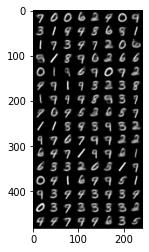

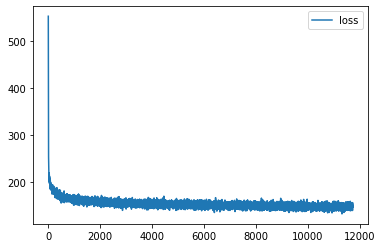

it: 12193; loss: 148.75123596191406 : : 469it [00:05, 93.65it/s]
it: 12194; loss: 139.55477905273438 : : 0it [00:00, ?it/s]

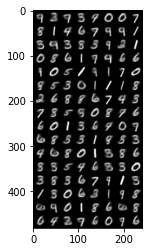

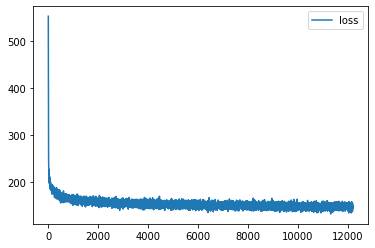

it: 12662; loss: 149.0796661376953 : : 469it [00:04, 94.78it/s] 
it: 12663; loss: 155.99554443359375 : : 0it [00:00, ?it/s]

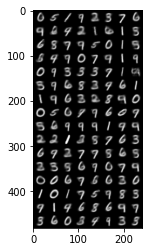

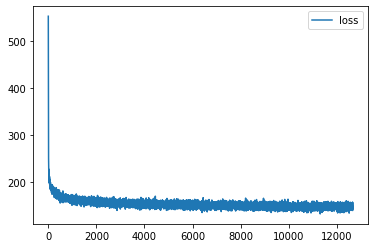

it: 13131; loss: 148.90191650390625 : : 469it [00:04, 93.83it/s]
it: 13132; loss: 151.28692626953125 : : 0it [00:00, ?it/s]

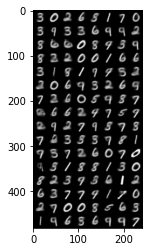

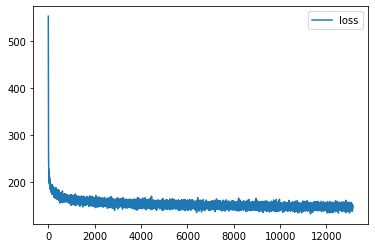

it: 13600; loss: 154.9332733154297 : : 469it [00:04, 94.95it/s] 
it: 13601; loss: 142.25839233398438 : : 0it [00:00, ?it/s]

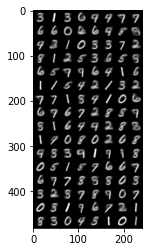

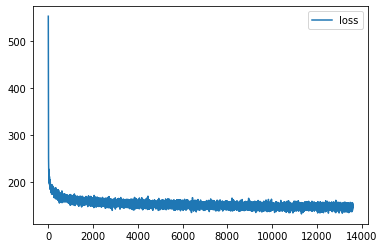

it: 14069; loss: 147.1942138671875 : : 469it [00:04, 96.58it/s]  
it: 14070; loss: 143.8624725341797 : : 0it [00:00, ?it/s]

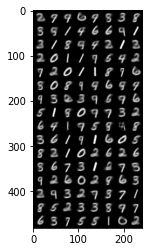

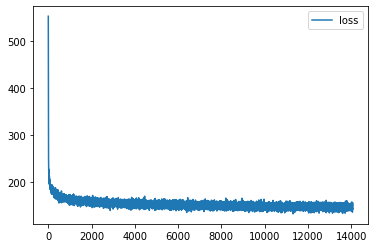

it: 14538; loss: 138.76507568359375 : : 469it [00:04, 96.22it/s] 
it: 14539; loss: 152.69253540039062 : : 0it [00:00, ?it/s]

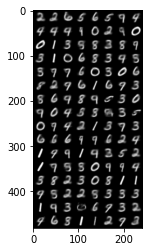

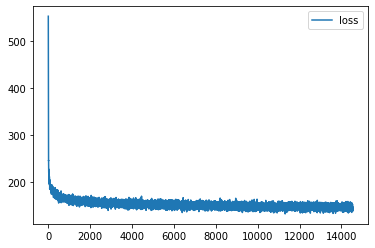

it: 15007; loss: 151.82974243164062 : : 469it [00:04, 96.25it/s] 
it: 15008; loss: 143.08663940429688 : : 0it [00:00, ?it/s]

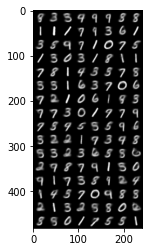

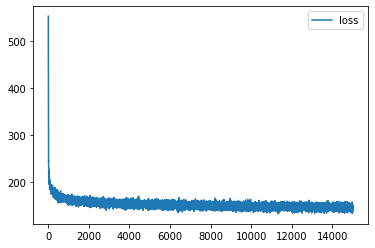

it: 15476; loss: 146.72523498535156 : : 469it [00:04, 95.50it/s] 
it: 15477; loss: 146.91476440429688 : : 0it [00:00, ?it/s]

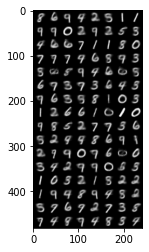

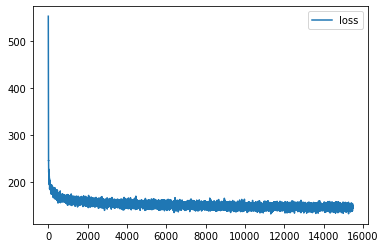

it: 15945; loss: 158.35446166992188 : : 469it [00:04, 95.32it/s]
it: 15946; loss: 147.25128173828125 : : 0it [00:00, ?it/s]

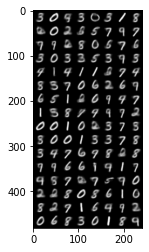

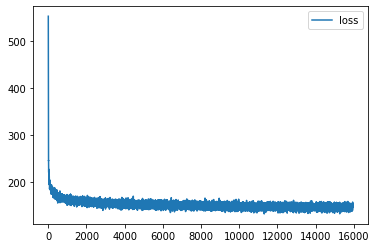

it: 16414; loss: 154.03916931152344 : : 469it [00:04, 94.68it/s]
it: 16415; loss: 145.3666534423828 : : 0it [00:00, ?it/s]

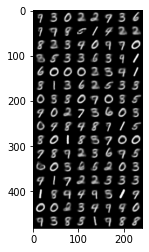

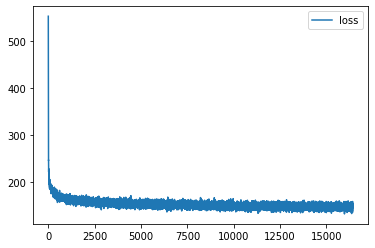

it: 16883; loss: 144.39845275878906 : : 469it [00:04, 94.87it/s]
it: 16884; loss: 145.21067810058594 : : 0it [00:00, ?it/s]

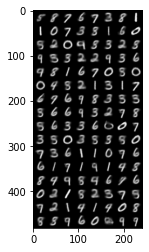

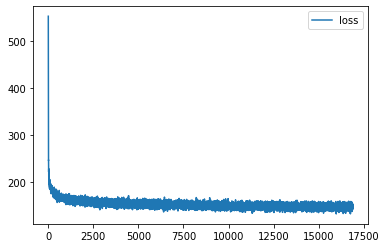

it: 17352; loss: 138.37852478027344 : : 469it [00:05, 91.48it/s]
it: 17353; loss: 146.0113525390625 : : 0it [00:00, ?it/s]

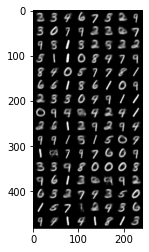

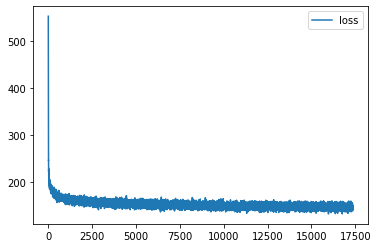

it: 17821; loss: 144.9368896484375 : : 469it [00:05, 93.23it/s] 
it: 17822; loss: 142.35543823242188 : : 0it [00:00, ?it/s]

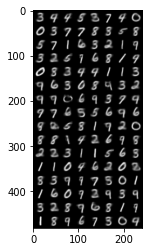

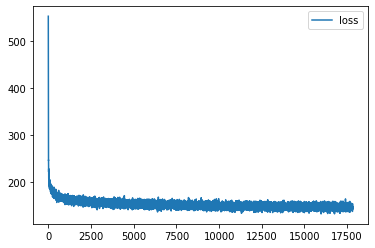

it: 18290; loss: 144.6494140625 : : 469it [00:05, 92.78it/s]    
it: 18291; loss: 147.72686767578125 : : 0it [00:00, ?it/s]

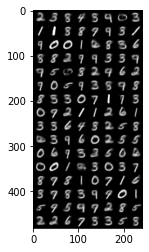

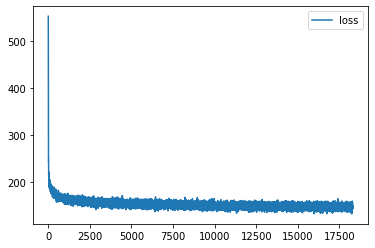

it: 18759; loss: 151.5015106201172 : : 469it [00:04, 95.05it/s]  
it: 18760; loss: 147.01109313964844 : : 0it [00:00, ?it/s]

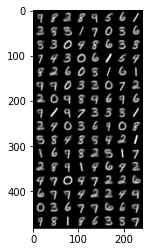

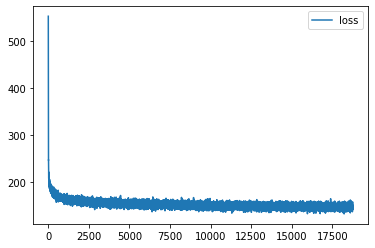

it: 19228; loss: 152.55038452148438 : : 469it [00:04, 94.57it/s]
it: 19229; loss: 151.2411346435547 : : 0it [00:00, ?it/s]

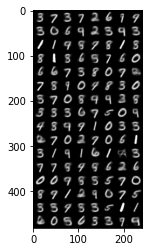

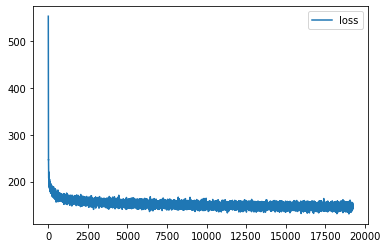

it: 19697; loss: 144.05874633789062 : : 469it [00:04, 94.69it/s]
it: 19698; loss: 144.4928436279297 : : 0it [00:00, ?it/s]

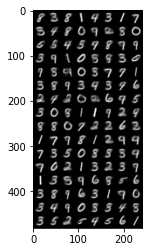

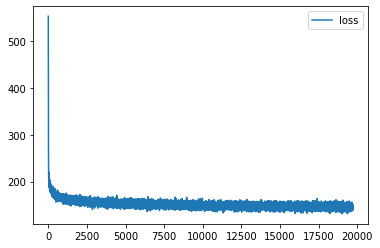

it: 20166; loss: 150.36544799804688 : : 469it [00:04, 95.32it/s] 
it: 20167; loss: 143.7860107421875 : : 0it [00:00, ?it/s]

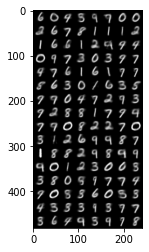

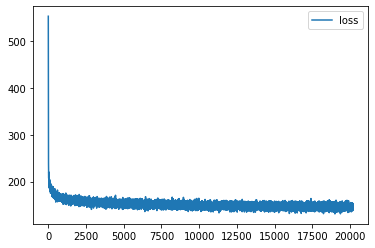

it: 20635; loss: 150.80343627929688 : : 469it [00:04, 94.95it/s] 
it: 20636; loss: 142.2445526123047 : : 0it [00:00, ?it/s]

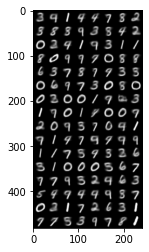

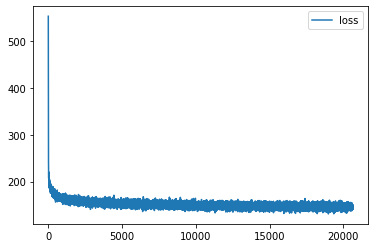

it: 21104; loss: 143.17111206054688 : : 469it [00:05, 93.62it/s] 
it: 21105; loss: 145.77621459960938 : : 0it [00:00, ?it/s]

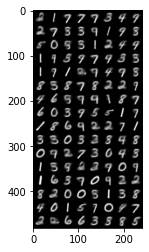

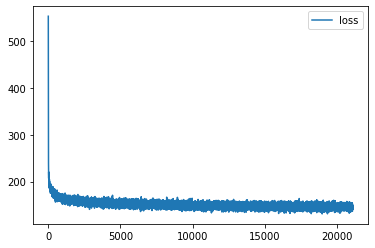

it: 21573; loss: 148.31578063964844 : : 469it [00:04, 95.75it/s] 
it: 21574; loss: 141.49575805664062 : : 0it [00:00, ?it/s]

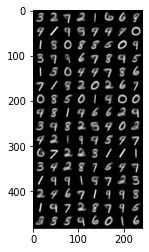

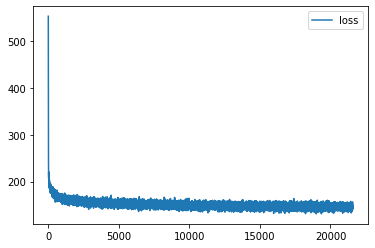

it: 22042; loss: 143.1210174560547 : : 469it [00:04, 95.84it/s]  
it: 22043; loss: 141.5930938720703 : : 0it [00:00, ?it/s]

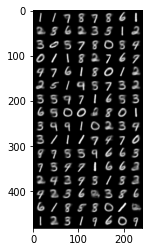

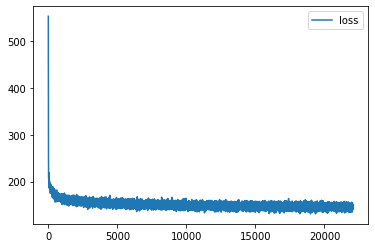

it: 22511; loss: 144.40408325195312 : : 469it [00:04, 95.55it/s] 
it: 22512; loss: 146.81716918945312 : : 0it [00:00, ?it/s]

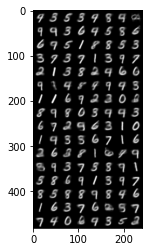

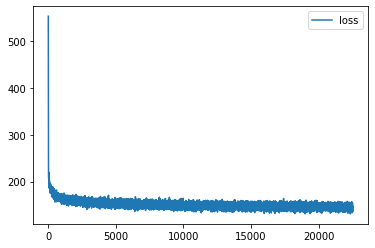

it: 22980; loss: 149.73779296875 : : 469it [00:04, 97.06it/s]    
it: 22981; loss: 143.65379333496094 : : 0it [00:00, ?it/s]

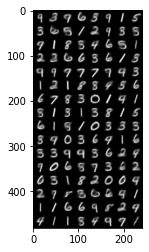

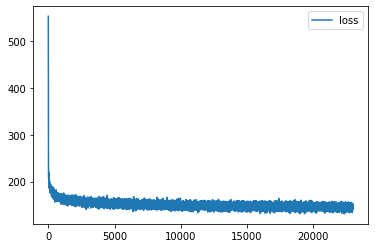

it: 23449; loss: 145.33106994628906 : : 469it [00:04, 96.87it/s] 
it: 23450; loss: 143.48779296875 : : 0it [00:00, ?it/s]

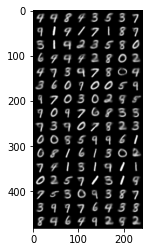

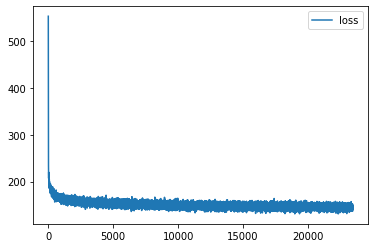

it: 23918; loss: 139.245361328125 : : 469it [00:05, 92.28it/s]  
it: 23919; loss: 149.427490234375 : : 0it [00:00, ?it/s]

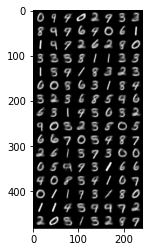

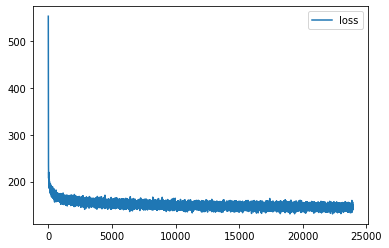

it: 24387; loss: 146.0662841796875 : : 469it [00:04, 95.68it/s] 
it: 24388; loss: 151.04493713378906 : : 0it [00:00, ?it/s]

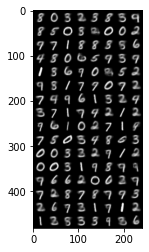

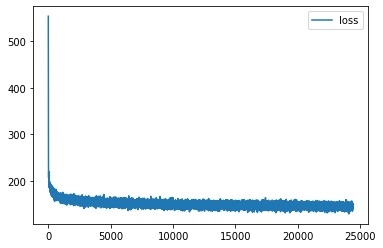

it: 24856; loss: 142.24851989746094 : : 469it [00:04, 95.50it/s] 
it: 24857; loss: 141.92324829101562 : : 0it [00:00, ?it/s]

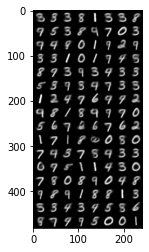

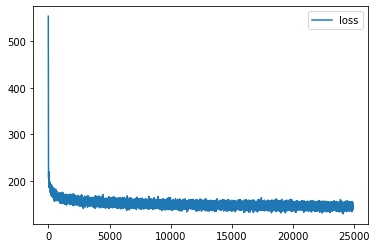

it: 25325; loss: 144.93011474609375 : : 469it [00:04, 94.34it/s]
it: 25326; loss: 134.73207092285156 : : 0it [00:00, ?it/s]

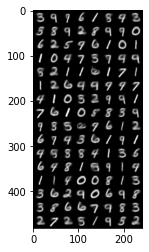

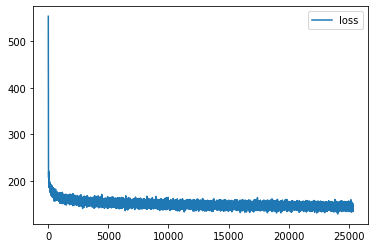

it: 25794; loss: 142.24058532714844 : : 469it [00:05, 93.69it/s]
it: 25795; loss: 147.34848022460938 : : 0it [00:00, ?it/s]

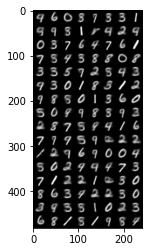

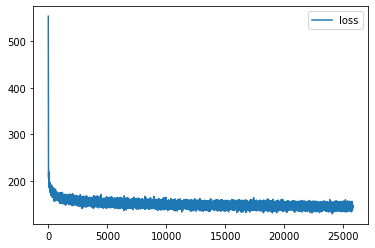

it: 26263; loss: 148.2673797607422 : : 469it [00:04, 96.12it/s]  
it: 26264; loss: 140.7897491455078 : : 0it [00:00, ?it/s]

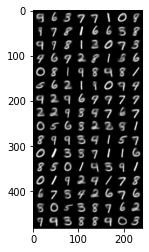

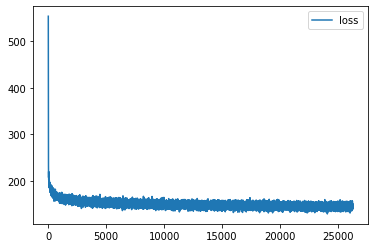

it: 26732; loss: 142.9429931640625 : : 469it [00:04, 95.77it/s]  
it: 26733; loss: 147.71673583984375 : : 0it [00:00, ?it/s]

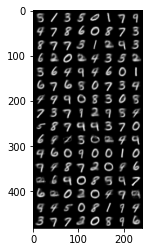

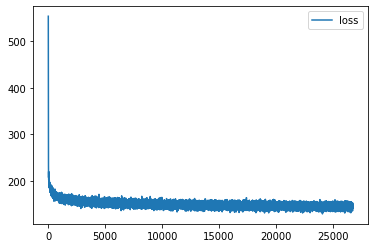

it: 27201; loss: 147.454345703125 : : 469it [00:04, 94.84it/s]  
it: 27202; loss: 149.2354736328125 : : 0it [00:00, ?it/s]

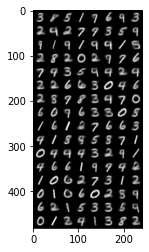

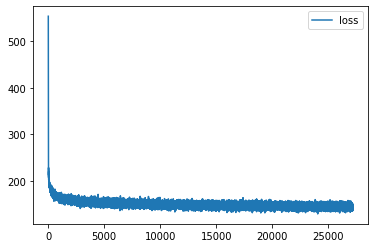

it: 27670; loss: 146.36085510253906 : : 469it [00:04, 95.31it/s] 
it: 27671; loss: 137.78306579589844 : : 0it [00:00, ?it/s]

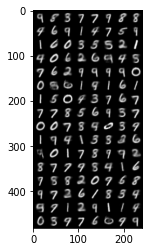

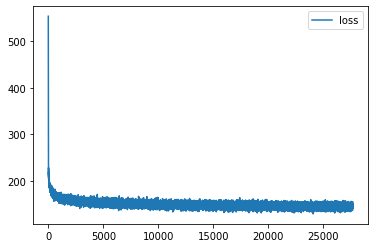

it: 28139; loss: 140.59320068359375 : : 469it [00:04, 94.37it/s] 
it: 28140; loss: 146.22373962402344 : : 0it [00:00, ?it/s]

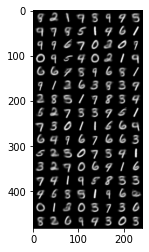

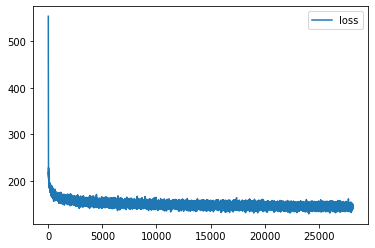

it: 28608; loss: 139.71775817871094 : : 469it [00:04, 94.33it/s] 
it: 28609; loss: 144.38027954101562 : : 0it [00:00, ?it/s]

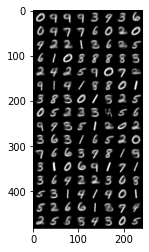

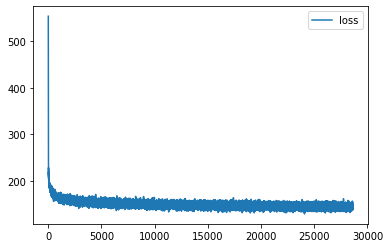

it: 29077; loss: 138.6853790283203 : : 469it [00:04, 95.76it/s]  
it: 29078; loss: 147.58639526367188 : : 0it [00:00, ?it/s]

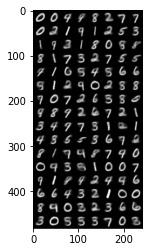

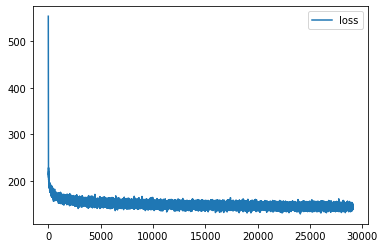

it: 29546; loss: 140.4158935546875 : : 469it [00:04, 94.28it/s] 
it: 29547; loss: 142.0257568359375 : : 0it [00:00, ?it/s]

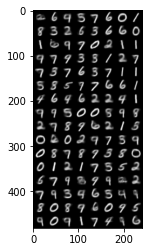

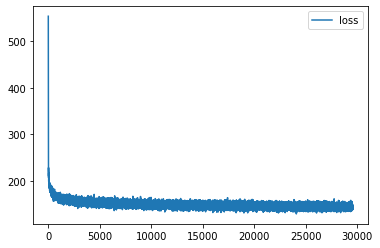

it: 30015; loss: 145.09471130371094 : : 469it [00:05, 93.36it/s]
it: 30016; loss: 143.2838134765625 : : 0it [00:00, ?it/s]

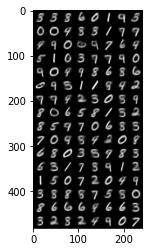

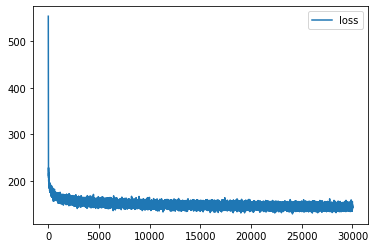

it: 30484; loss: 138.48280334472656 : : 469it [00:05, 92.29it/s]
it: 30485; loss: 142.37814331054688 : : 0it [00:00, ?it/s]

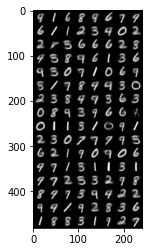

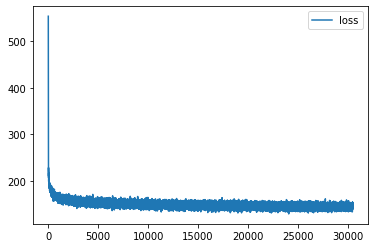

it: 30953; loss: 141.17709350585938 : : 469it [00:04, 95.48it/s]
it: 30954; loss: 152.52133178710938 : : 0it [00:00, ?it/s]

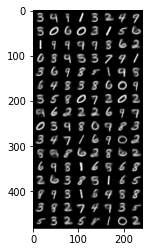

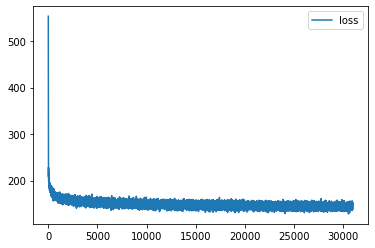

it: 31422; loss: 142.95489501953125 : : 469it [00:04, 94.26it/s]
it: 31423; loss: 141.09225463867188 : : 0it [00:00, ?it/s]

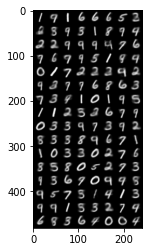

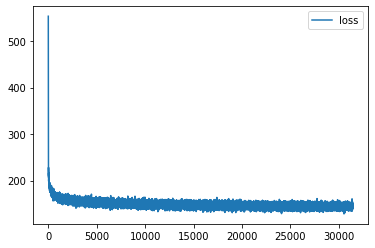

it: 31891; loss: 143.7244110107422 : : 469it [00:05, 92.19it/s] 
it: 31892; loss: 146.3766326904297 : : 0it [00:00, ?it/s]

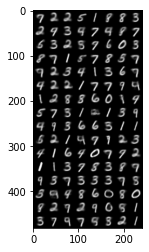

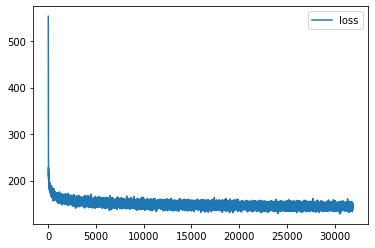

it: 32360; loss: 143.58436584472656 : : 469it [00:04, 94.51it/s] 
it: 32361; loss: 141.01065063476562 : : 0it [00:00, ?it/s]

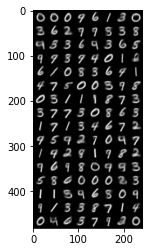

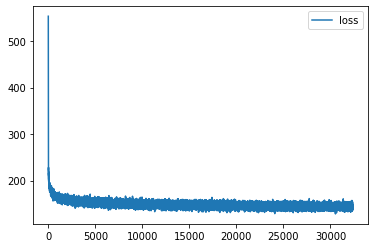

it: 32829; loss: 141.7978973388672 : : 469it [00:04, 95.97it/s] 
it: 32830; loss: 140.27557373046875 : : 0it [00:00, ?it/s]

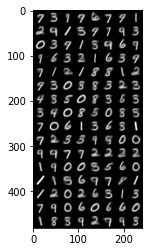

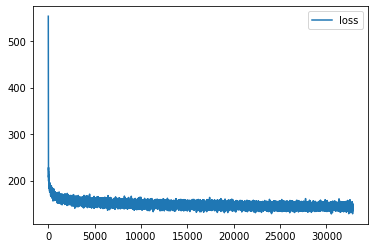

it: 33298; loss: 143.44235229492188 : : 469it [00:04, 94.33it/s]
it: 33299; loss: 139.6390380859375 : : 0it [00:00, ?it/s]

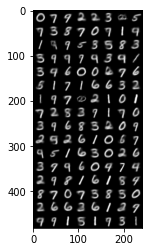

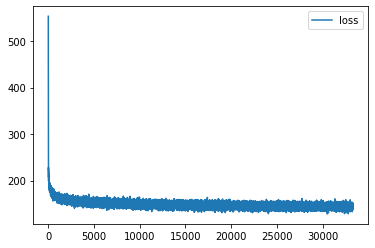

it: 33767; loss: 142.4442901611328 : : 469it [00:04, 95.92it/s]  
it: 33768; loss: 144.53369140625 : : 0it [00:00, ?it/s]

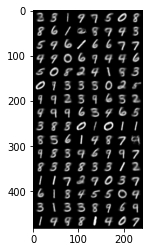

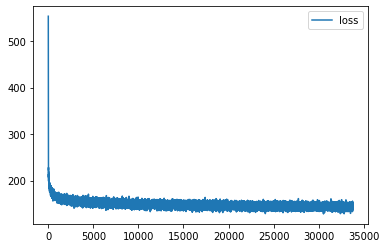

it: 34236; loss: 146.16830444335938 : : 469it [00:04, 94.71it/s]
it: 34237; loss: 152.37408447265625 : : 0it [00:00, ?it/s]

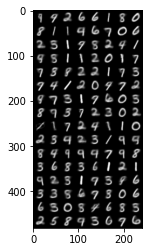

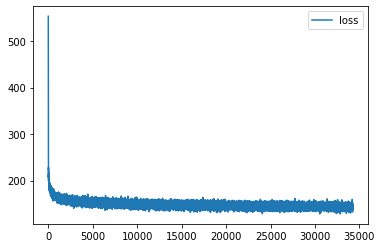

it: 34705; loss: 146.8014373779297 : : 469it [00:04, 94.15it/s]  
it: 34706; loss: 136.48361206054688 : : 0it [00:00, ?it/s]

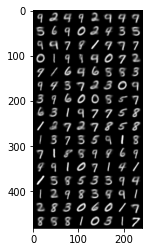

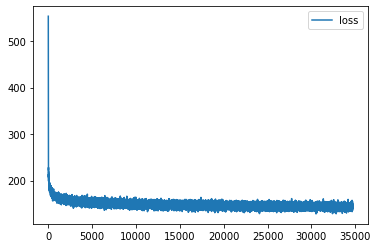

it: 35174; loss: 141.4579315185547 : : 469it [00:05, 93.50it/s] 
it: 35175; loss: 140.91510009765625 : : 0it [00:00, ?it/s]

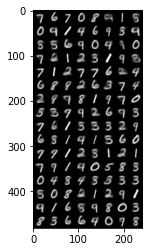

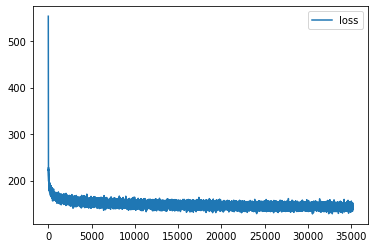

it: 35643; loss: 141.78785705566406 : : 469it [00:05, 89.40it/s]
it: 35644; loss: 138.80294799804688 : : 0it [00:00, ?it/s]

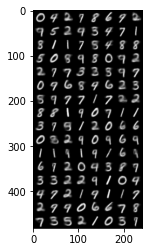

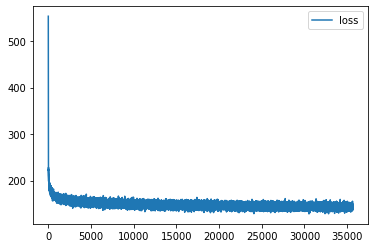

it: 36112; loss: 134.42739868164062 : : 469it [00:05, 89.73it/s]
it: 36113; loss: 145.40403747558594 : : 0it [00:00, ?it/s]

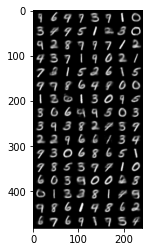

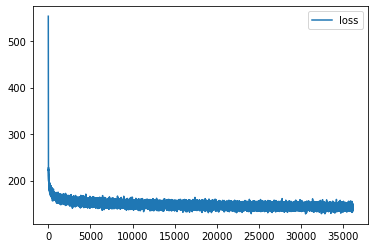

it: 36581; loss: 145.34762573242188 : : 469it [00:05, 87.95it/s]
it: 36582; loss: 138.25491333007812 : : 0it [00:00, ?it/s]

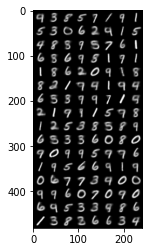

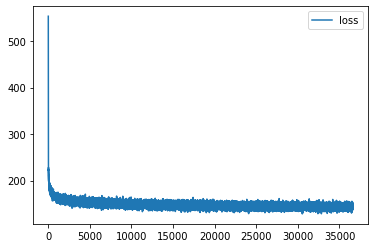

it: 37050; loss: 139.4603729248047 : : 469it [00:05, 91.83it/s]  
it: 37051; loss: 150.24026489257812 : : 0it [00:00, ?it/s]

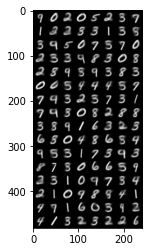

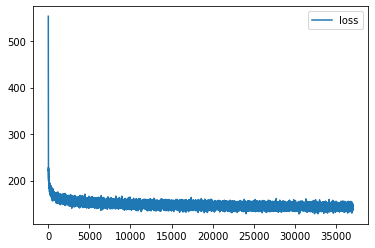

it: 37519; loss: 135.3163604736328 : : 469it [00:05, 92.66it/s] 
it: 37520; loss: 141.91622924804688 : : 0it [00:00, ?it/s]

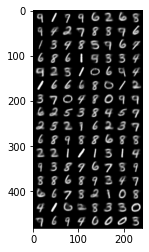

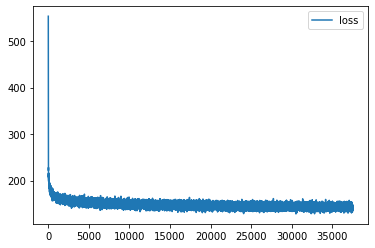

it: 37988; loss: 133.24948120117188 : : 469it [00:05, 91.28it/s]
it: 37989; loss: 151.3015594482422 : : 0it [00:00, ?it/s]

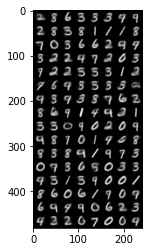

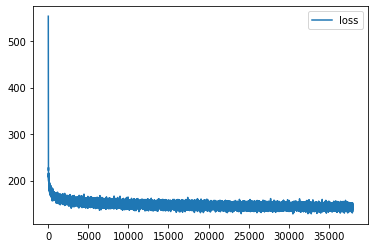

it: 38457; loss: 145.88050842285156 : : 469it [00:05, 92.22it/s]
it: 38458; loss: 146.38748168945312 : : 0it [00:00, ?it/s]

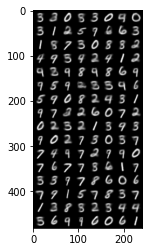

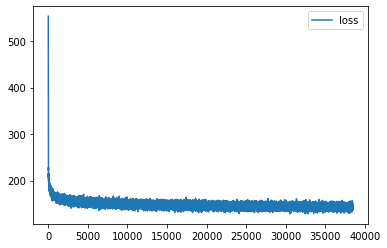

it: 38926; loss: 151.80287170410156 : : 469it [00:05, 92.96it/s]
it: 38927; loss: 132.32965087890625 : : 0it [00:00, ?it/s]

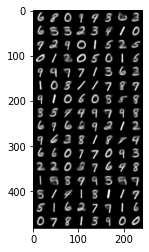

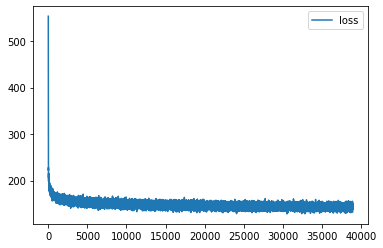

it: 39395; loss: 138.54071044921875 : : 469it [00:04, 94.33it/s]
it: 39396; loss: 147.5908660888672 : : 0it [00:00, ?it/s]

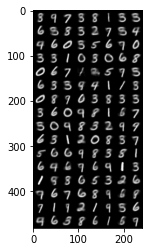

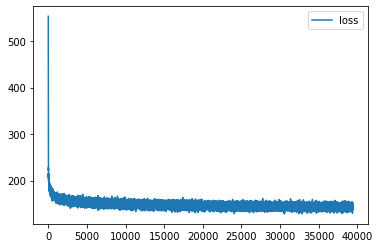

it: 39864; loss: 141.98992919921875 : : 469it [00:05, 90.30it/s]
it: 39865; loss: 140.73516845703125 : : 0it [00:00, ?it/s]

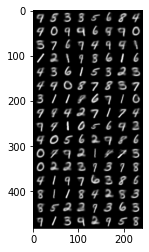

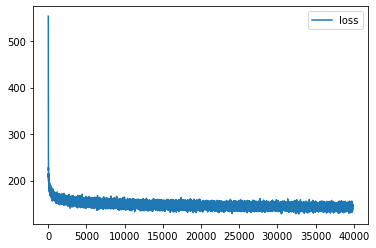

it: 40333; loss: 138.8219757080078 : : 469it [00:05, 92.77it/s] 
it: 40334; loss: 143.60830688476562 : : 0it [00:00, ?it/s]

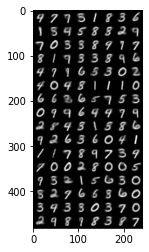

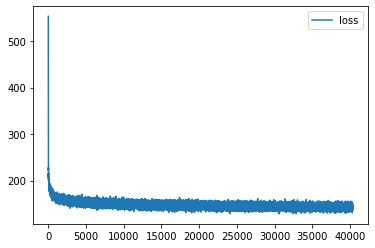

it: 40802; loss: 142.7752227783203 : : 469it [00:04, 94.91it/s] 
it: 40803; loss: 140.59906005859375 : : 0it [00:00, ?it/s]

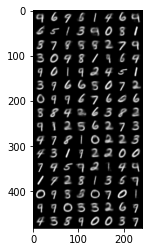

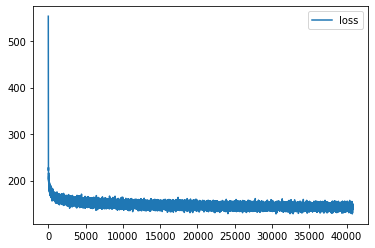

it: 41271; loss: 147.68319702148438 : : 469it [00:04, 95.16it/s] 
it: 41272; loss: 142.83201599121094 : : 0it [00:00, ?it/s]

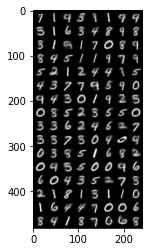

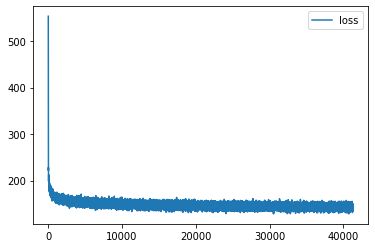

it: 41740; loss: 141.54754638671875 : : 469it [00:05, 93.03it/s]
it: 41741; loss: 144.97979736328125 : : 0it [00:00, ?it/s]

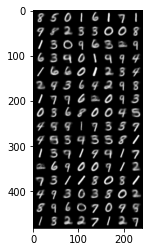

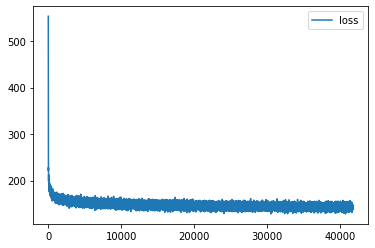

it: 42209; loss: 138.4112548828125 : : 469it [00:05, 93.36it/s] 
it: 42210; loss: 133.7941436767578 : : 0it [00:00, ?it/s]

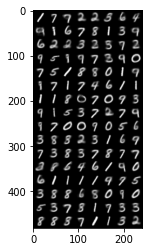

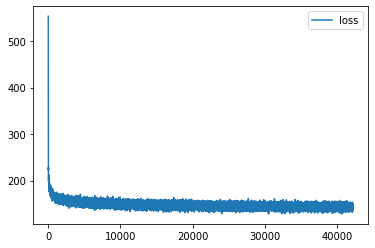

it: 42678; loss: 137.89036560058594 : : 469it [00:04, 94.41it/s]
it: 42679; loss: 141.38230895996094 : : 0it [00:00, ?it/s]

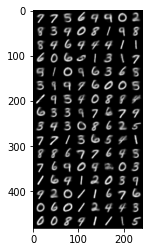

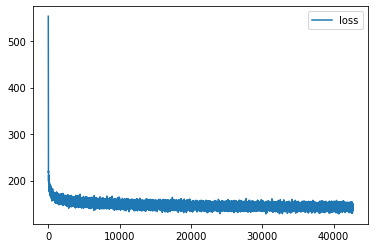

it: 43147; loss: 147.2689971923828 : : 469it [00:04, 94.01it/s] 
it: 43148; loss: 135.35653686523438 : : 0it [00:00, ?it/s]

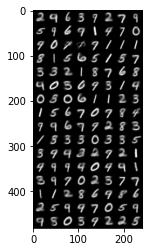

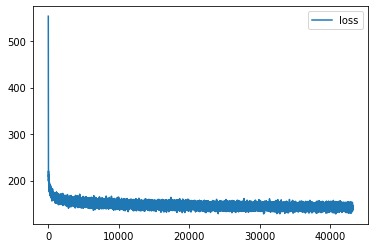

it: 43616; loss: 138.65159606933594 : : 469it [00:05, 91.27it/s]
it: 43617; loss: 139.1769561767578 : : 0it [00:00, ?it/s]

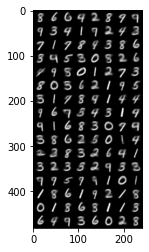

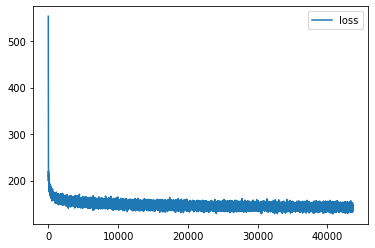

it: 44085; loss: 140.08958435058594 : : 469it [00:05, 92.27it/s]
it: 44086; loss: 143.80746459960938 : : 0it [00:00, ?it/s]

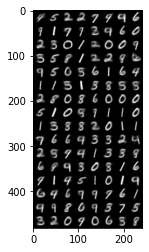

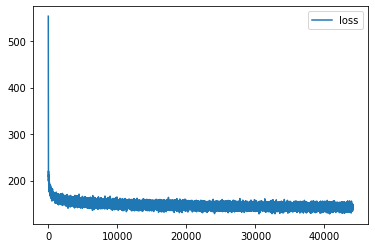

it: 44554; loss: 147.2498321533203 : : 469it [00:05, 91.77it/s] 
it: 44555; loss: 142.66415405273438 : : 0it [00:00, ?it/s]

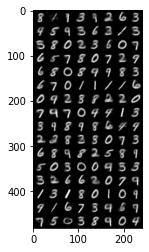

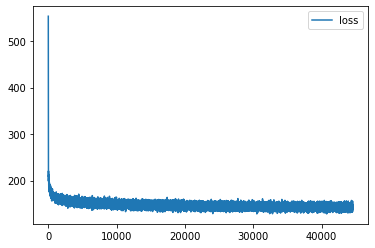

it: 45023; loss: 137.3603515625 : : 469it [00:05, 92.44it/s]    
it: 45024; loss: 140.56077575683594 : : 0it [00:00, ?it/s]

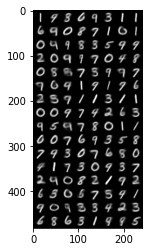

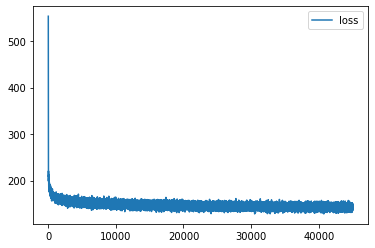

it: 45492; loss: 140.47898864746094 : : 469it [00:04, 95.22it/s]
it: 45493; loss: 143.49871826171875 : : 0it [00:00, ?it/s]

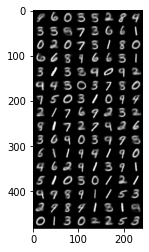

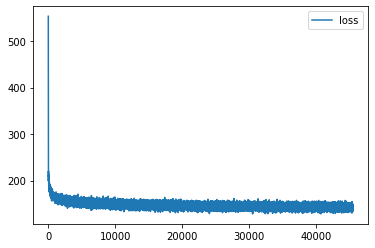

it: 45961; loss: 141.94166564941406 : : 469it [00:04, 94.54it/s]
it: 45962; loss: 141.67987060546875 : : 0it [00:00, ?it/s]

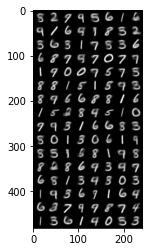

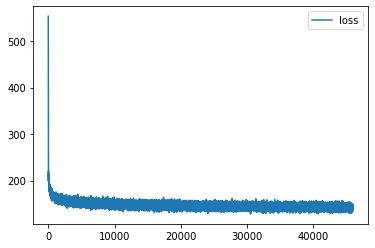

it: 46430; loss: 145.55613708496094 : : 469it [00:04, 94.98it/s]
it: 46431; loss: 144.80690002441406 : : 0it [00:00, ?it/s]

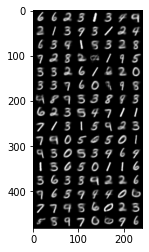

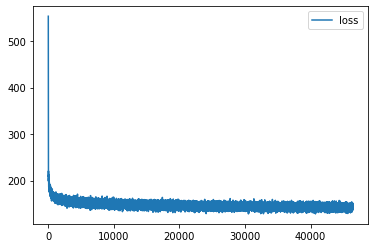

it: 46899; loss: 142.96571350097656 : : 469it [00:04, 94.65it/s]
it: 46900; loss: 147.3494415283203 : : 0it [00:00, ?it/s]

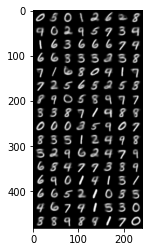

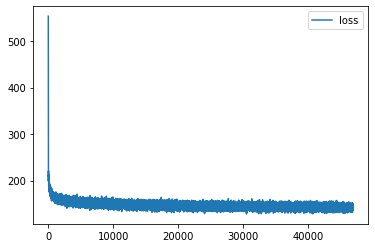

it: 47368; loss: 131.80609130859375 : : 469it [00:04, 94.91it/s] 
it: 47369; loss: 140.01895141601562 : : 0it [00:00, ?it/s]

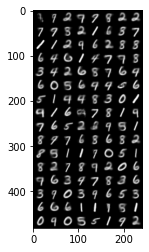

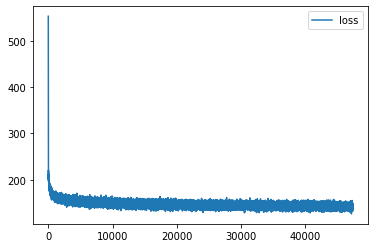

it: 47837; loss: 143.44241333007812 : : 469it [00:04, 94.02it/s]
it: 47838; loss: 140.48110961914062 : : 0it [00:00, ?it/s]

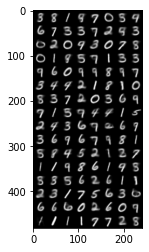

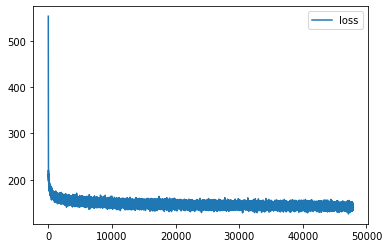

it: 48306; loss: 148.28477478027344 : : 469it [00:05, 93.08it/s]
it: 48307; loss: 140.36297607421875 : : 0it [00:00, ?it/s]

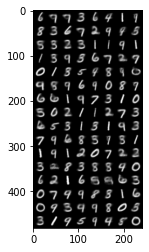

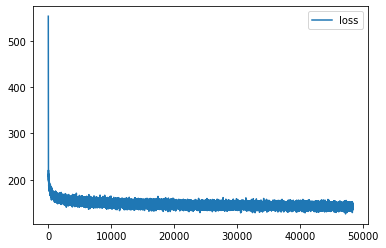

it: 48775; loss: 143.91146850585938 : : 469it [00:04, 93.90it/s]
it: 48776; loss: 140.63348388671875 : : 0it [00:00, ?it/s]

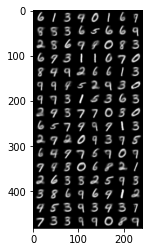

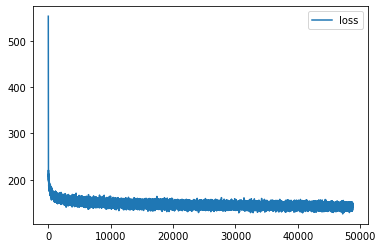

it: 49244; loss: 140.0559539794922 : : 469it [00:05, 92.40it/s] 
it: 49245; loss: 141.394287109375 : : 0it [00:00, ?it/s]

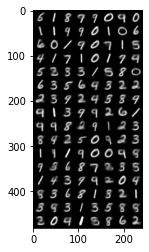

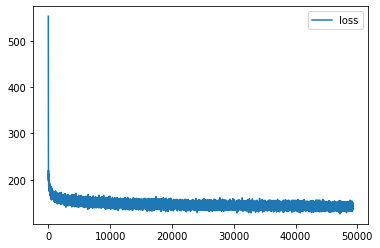

it: 49713; loss: 150.3759002685547 : : 469it [00:05, 92.84it/s] 
it: 49714; loss: 147.2550506591797 : : 0it [00:00, ?it/s]

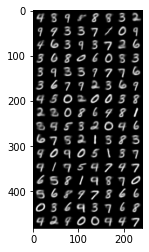

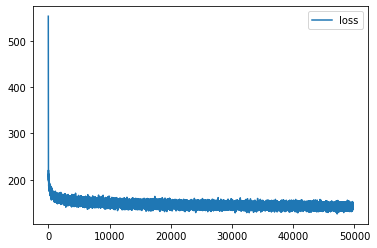

it: 50182; loss: 146.65928649902344 : : 469it [00:05, 93.59it/s]
it: 50183; loss: 133.44869995117188 : : 0it [00:00, ?it/s]

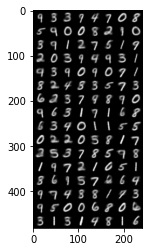

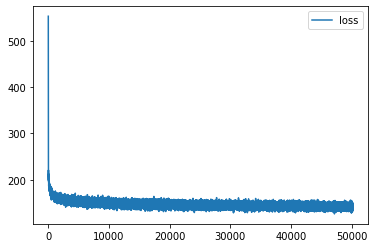

it: 50651; loss: 141.24288940429688 : : 469it [00:05, 92.20it/s]
it: 50652; loss: 143.76075744628906 : : 0it [00:00, ?it/s]

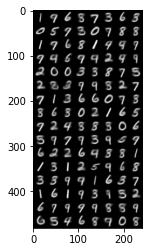

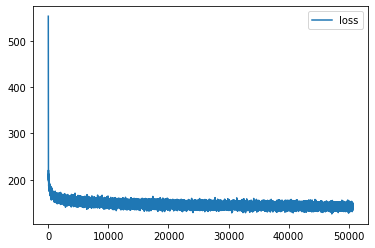

it: 51120; loss: 144.6411895751953 : : 469it [00:04, 94.08it/s] 
it: 51121; loss: 146.89097595214844 : : 0it [00:00, ?it/s]

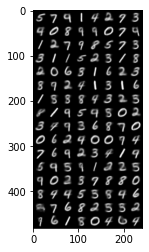

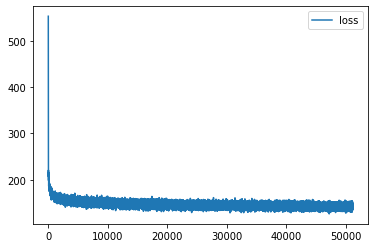

it: 51589; loss: 141.04959106445312 : : 469it [00:05, 92.39it/s]
it: 51590; loss: 137.3514404296875 : : 0it [00:00, ?it/s]

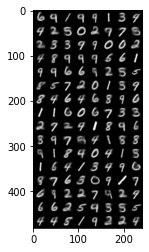

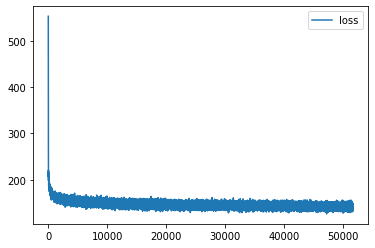

it: 52058; loss: 141.70693969726562 : : 469it [00:05, 93.80it/s]
it: 52059; loss: 142.71963500976562 : : 0it [00:00, ?it/s]

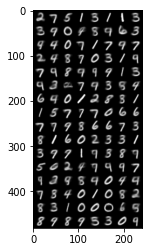

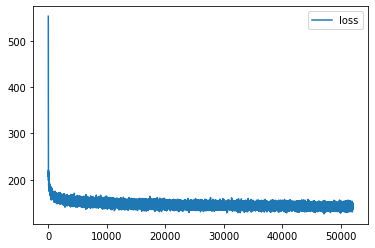

it: 52527; loss: 140.8977508544922 : : 469it [00:05, 93.43it/s] 
it: 52528; loss: 149.75282287597656 : : 0it [00:00, ?it/s]

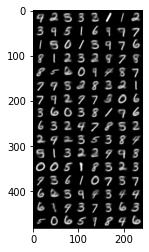

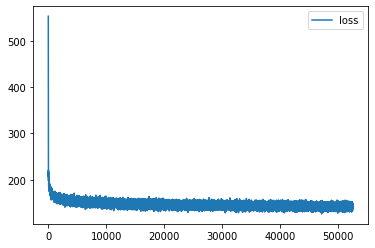

it: 52996; loss: 150.4853515625 : : 469it [00:05, 92.36it/s]    
it: 52997; loss: 141.81089782714844 : : 0it [00:00, ?it/s]

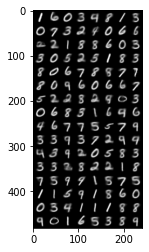

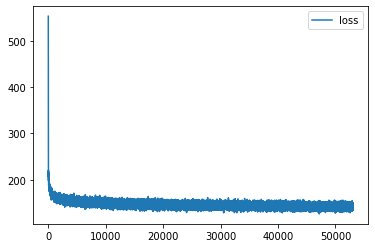

it: 53465; loss: 143.62257385253906 : : 469it [00:04, 93.99it/s]
it: 53466; loss: 142.14144897460938 : : 0it [00:00, ?it/s]

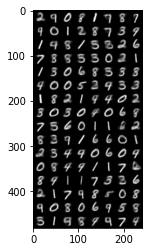

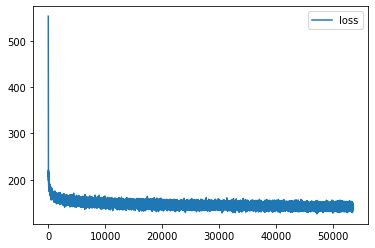

it: 53934; loss: 145.1543426513672 : : 469it [00:05, 93.68it/s] 
it: 53935; loss: 141.125 : : 0it [00:00, ?it/s]

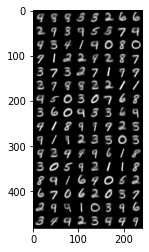

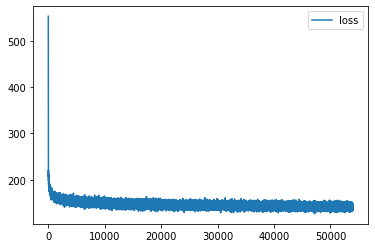

it: 54403; loss: 135.94830322265625 : : 469it [00:04, 95.03it/s]
it: 54404; loss: 139.42837524414062 : : 0it [00:00, ?it/s]

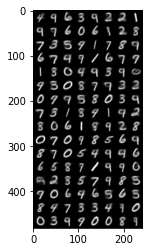

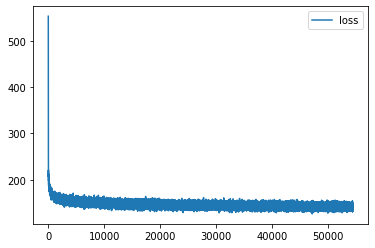

it: 54872; loss: 147.27406311035156 : : 469it [00:05, 91.49it/s]
it: 54873; loss: 145.29672241210938 : : 0it [00:00, ?it/s]

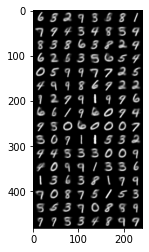

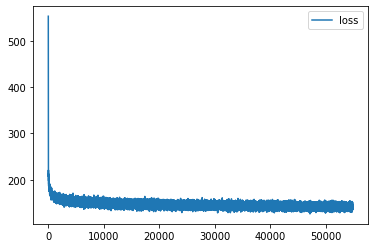

it: 55341; loss: 146.9429168701172 : : 469it [00:04, 94.52it/s] 
it: 55342; loss: 141.2422332763672 : : 0it [00:00, ?it/s]

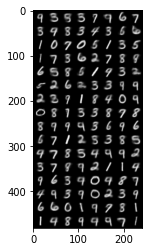

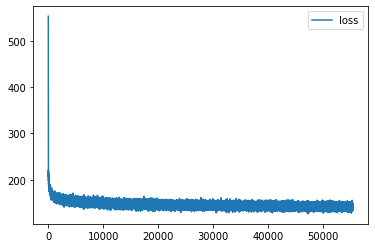

it: 55810; loss: 134.37705993652344 : : 469it [00:05, 93.54it/s]
it: 55811; loss: 139.4976348876953 : : 0it [00:00, ?it/s]

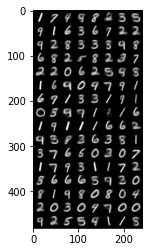

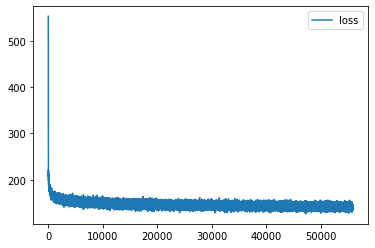

it: 56279; loss: 143.96224975585938 : : 469it [00:05, 93.53it/s]
it: 56280; loss: 145.49520874023438 : : 0it [00:00, ?it/s]

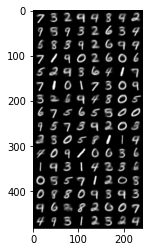

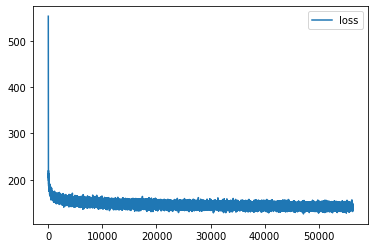

it: 56748; loss: 136.31695556640625 : : 469it [00:04, 95.19it/s] 
it: 56749; loss: 142.23541259765625 : : 0it [00:00, ?it/s]

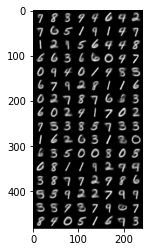

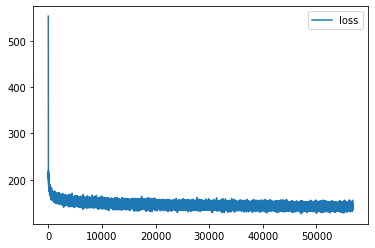

it: 57217; loss: 145.3590545654297 : : 469it [00:05, 93.53it/s] 
it: 57218; loss: 137.39312744140625 : : 0it [00:00, ?it/s]

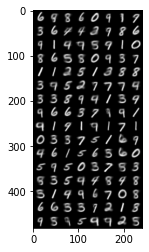

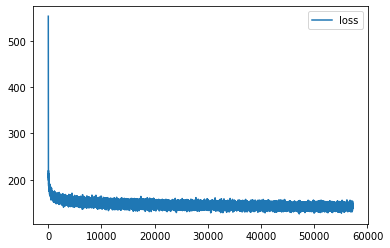

it: 57686; loss: 145.89047241210938 : : 469it [00:05, 91.45it/s]
it: 57687; loss: 144.9226837158203 : : 0it [00:00, ?it/s]

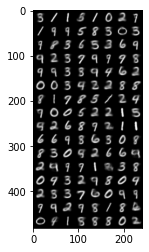

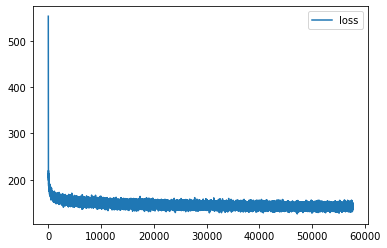

it: 58155; loss: 144.5554962158203 : : 469it [00:05, 92.95it/s] 
it: 58156; loss: 141.00123596191406 : : 0it [00:00, ?it/s]

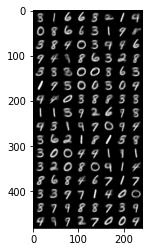

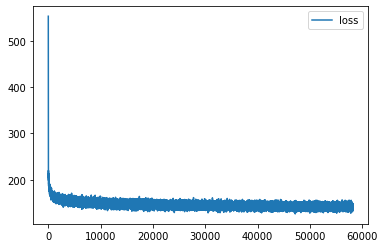

it: 58624; loss: 137.42391967773438 : : 469it [00:04, 94.05it/s] 
it: 58625; loss: 141.92538452148438 : : 0it [00:00, ?it/s]

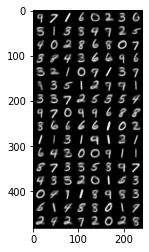

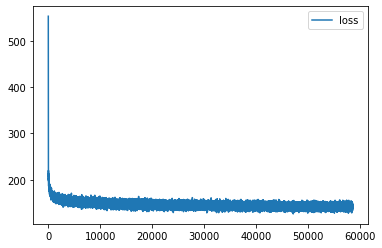

it: 59093; loss: 147.35604858398438 : : 469it [00:05, 92.02it/s]
it: 59094; loss: 144.78594970703125 : : 0it [00:00, ?it/s]

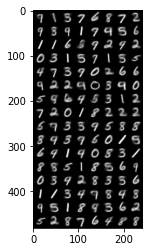

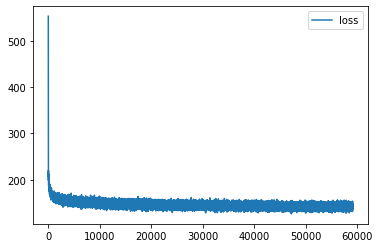

it: 59562; loss: 142.73719787597656 : : 469it [00:04, 94.98it/s]
it: 59563; loss: 136.23048400878906 : : 0it [00:00, ?it/s]

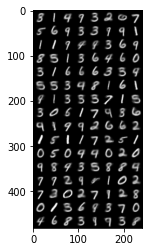

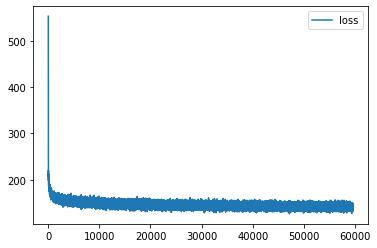

it: 60031; loss: 135.24853515625 : : 469it [00:05, 93.21it/s]   
it: 60032; loss: 143.0670166015625 : : 0it [00:00, ?it/s]

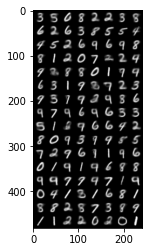

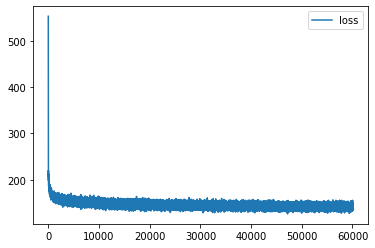

it: 60500; loss: 133.8798065185547 : : 469it [00:05, 92.59it/s] 
it: 60501; loss: 141.01760864257812 : : 0it [00:00, ?it/s]

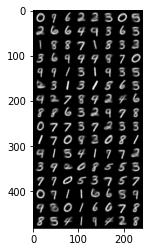

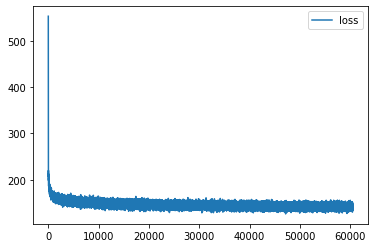

it: 60969; loss: 143.33238220214844 : : 469it [00:04, 95.19it/s]
it: 60970; loss: 139.17279052734375 : : 0it [00:00, ?it/s]

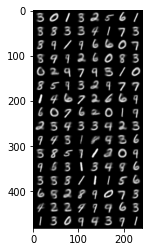

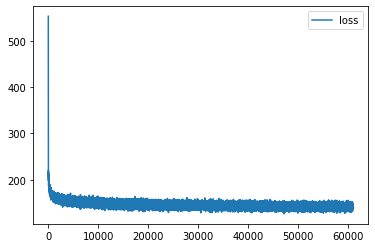

it: 61438; loss: 138.27369689941406 : : 469it [00:05, 92.14it/s]
it: 61439; loss: 131.56040954589844 : : 0it [00:00, ?it/s]

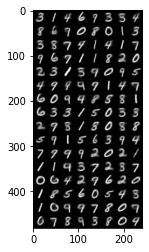

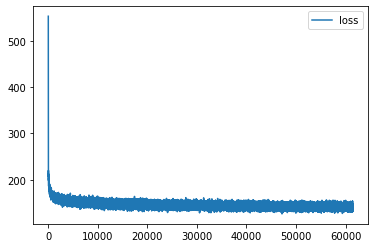

it: 61907; loss: 142.2871551513672 : : 469it [00:04, 94.81it/s]  
it: 61908; loss: 138.40966796875 : : 0it [00:00, ?it/s]

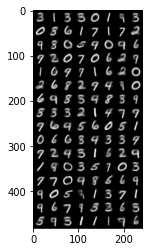

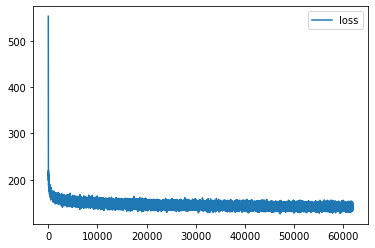

it: 62376; loss: 143.6238555908203 : : 469it [00:05, 93.47it/s] 
it: 62377; loss: 133.95494079589844 : : 0it [00:00, ?it/s]

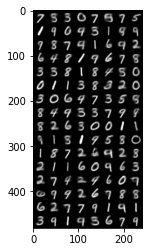

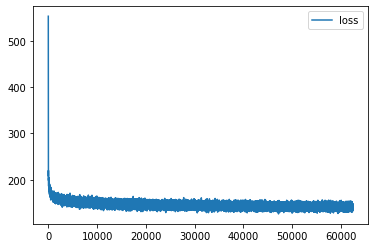

it: 62845; loss: 143.0301055908203 : : 469it [00:05, 92.85it/s] 
it: 62846; loss: 139.5209197998047 : : 0it [00:00, ?it/s]

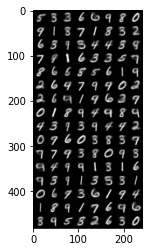

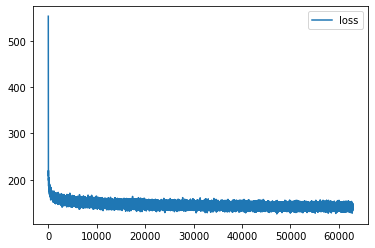

it: 63314; loss: 134.5308380126953 : : 469it [00:04, 94.21it/s]  
it: 63315; loss: 146.20375061035156 : : 0it [00:00, ?it/s]

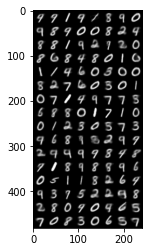

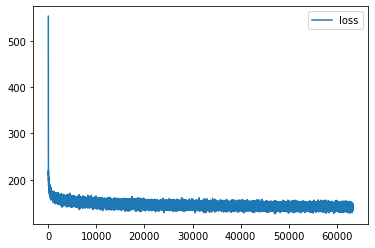

it: 63783; loss: 149.67596435546875 : : 469it [00:05, 91.97it/s]
it: 63784; loss: 141.86231994628906 : : 0it [00:00, ?it/s]

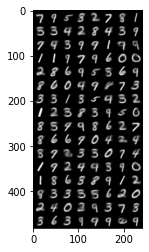

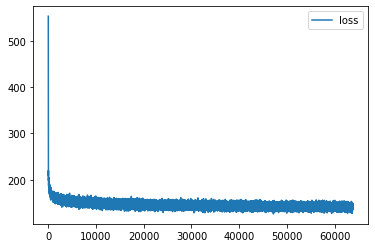

it: 64252; loss: 135.50485229492188 : : 469it [00:05, 93.16it/s]
it: 64253; loss: 137.46002197265625 : : 0it [00:00, ?it/s]

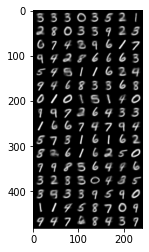

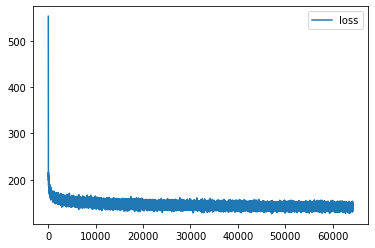

it: 64721; loss: 138.38819885253906 : : 469it [00:05, 92.84it/s]
it: 64722; loss: 138.8079071044922 : : 0it [00:00, ?it/s]

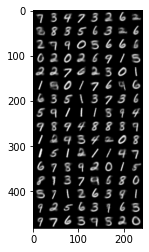

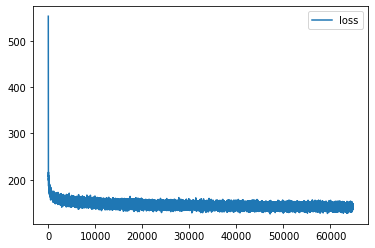

it: 65190; loss: 140.08926391601562 : : 469it [00:05, 92.70it/s]
it: 65191; loss: 141.5556182861328 : : 0it [00:00, ?it/s]

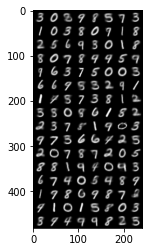

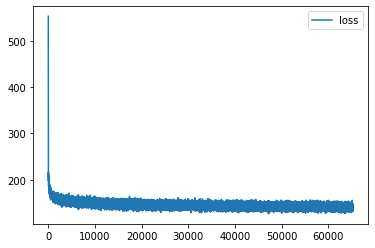

it: 65659; loss: 139.1648712158203 : : 469it [00:05, 93.38it/s] 
it: 65660; loss: 135.8519287109375 : : 0it [00:00, ?it/s]

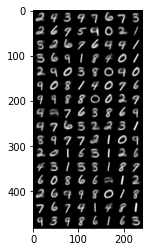

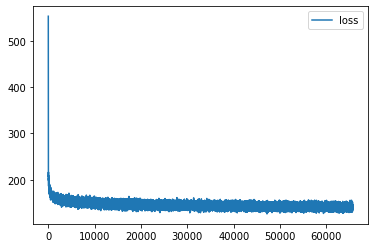

it: 66128; loss: 135.76966857910156 : : 469it [00:05, 92.03it/s]
it: 66129; loss: 143.92074584960938 : : 0it [00:00, ?it/s]

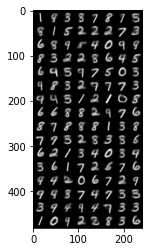

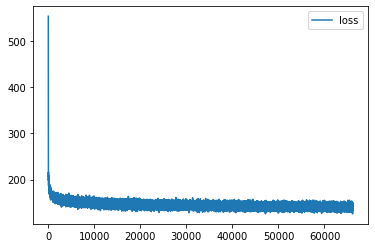

it: 66597; loss: 136.15350341796875 : : 469it [00:05, 93.42it/s]
it: 66598; loss: 139.58071899414062 : : 0it [00:00, ?it/s]

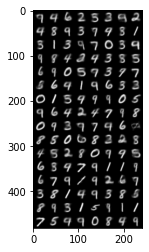

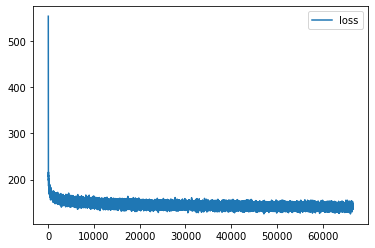

it: 67066; loss: 142.65771484375 : : 469it [00:05, 92.55it/s]   
it: 67067; loss: 140.277099609375 : : 0it [00:00, ?it/s]

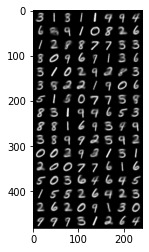

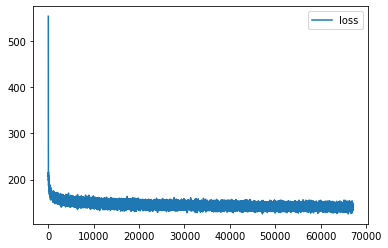

it: 67535; loss: 138.68577575683594 : : 469it [00:04, 94.21it/s] 
it: 67536; loss: 136.8435516357422 : : 0it [00:00, ?it/s]

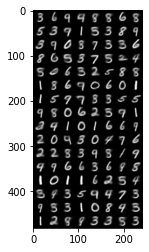

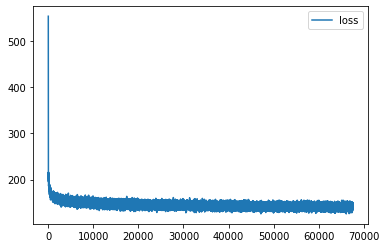

it: 68004; loss: 144.28050231933594 : : 469it [00:04, 94.57it/s] 
it: 68005; loss: 154.05787658691406 : : 0it [00:00, ?it/s]

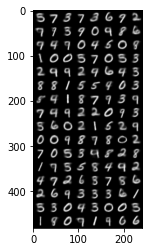

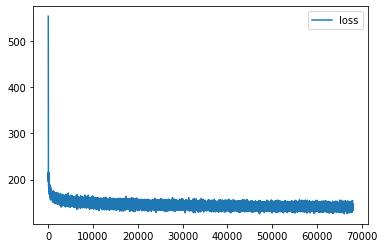

it: 68473; loss: 144.75990295410156 : : 469it [00:05, 93.68it/s]
it: 68474; loss: 141.27455139160156 : : 0it [00:00, ?it/s]

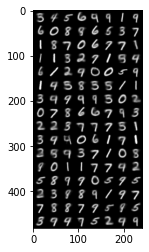

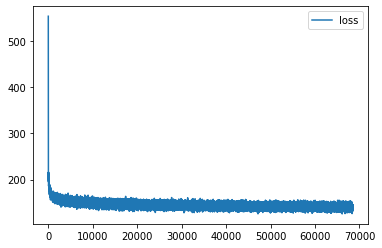

it: 68942; loss: 142.6529998779297 : : 469it [00:05, 93.10it/s] 
it: 68943; loss: 141.54684448242188 : : 0it [00:00, ?it/s]

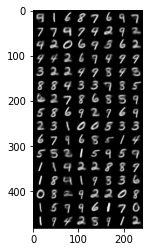

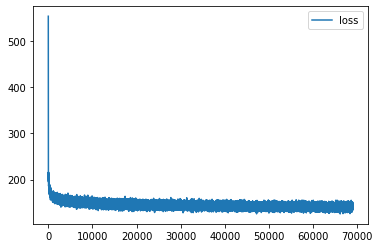

it: 69411; loss: 144.37625122070312 : : 469it [00:05, 93.50it/s] 
it: 69412; loss: 138.13145446777344 : : 0it [00:00, ?it/s]

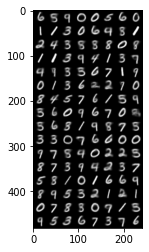

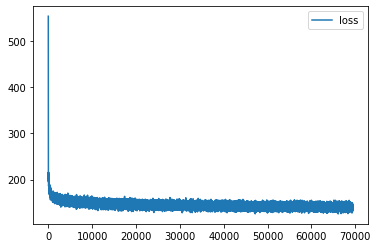

it: 69880; loss: 136.17417907714844 : : 469it [00:04, 94.73it/s]
it: 69881; loss: 143.0023193359375 : : 0it [00:00, ?it/s]

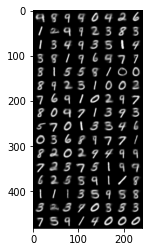

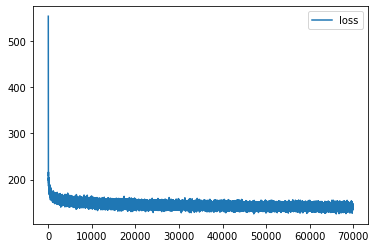

it: 70349; loss: 139.4785614013672 : : 469it [00:05, 91.13it/s] 
it: 70350; loss: 139.6517333984375 : : 0it [00:00, ?it/s]

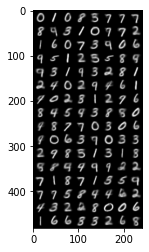

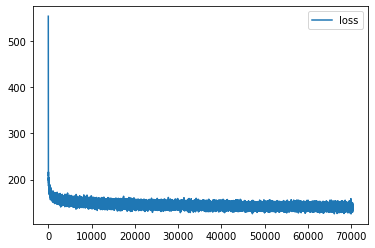

it: 70818; loss: 139.63192749023438 : : 469it [00:05, 92.09it/s]
it: 70819; loss: 133.36453247070312 : : 0it [00:00, ?it/s]

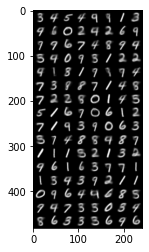

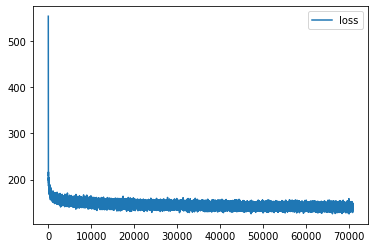

it: 71287; loss: 147.24557495117188 : : 469it [00:05, 91.85it/s]
it: 71288; loss: 143.32322692871094 : : 0it [00:00, ?it/s]

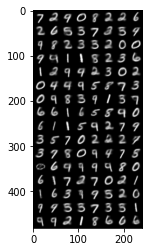

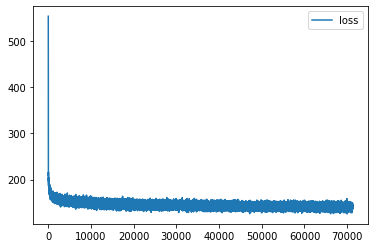

it: 71756; loss: 139.3876953125 : : 469it [00:05, 92.14it/s]    
it: 71757; loss: 136.7100372314453 : : 0it [00:00, ?it/s]

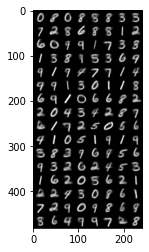

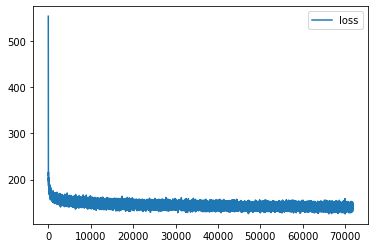

it: 72225; loss: 141.56326293945312 : : 469it [00:05, 91.36it/s]
it: 72226; loss: 143.58334350585938 : : 0it [00:00, ?it/s]

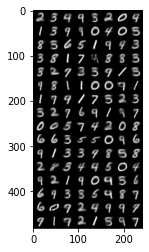

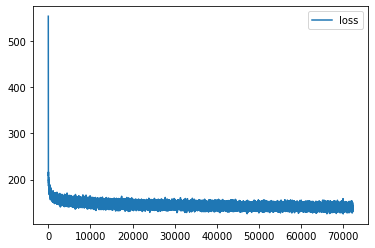

it: 72694; loss: 144.34730529785156 : : 469it [00:05, 93.75it/s]
it: 72695; loss: 136.94708251953125 : : 0it [00:00, ?it/s]

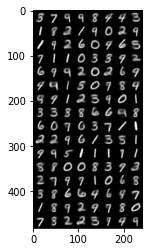

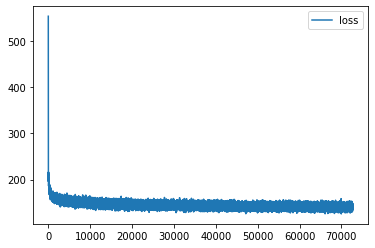

it: 73163; loss: 144.94154357910156 : : 469it [00:05, 92.85it/s]
it: 73164; loss: 139.99810791015625 : : 0it [00:00, ?it/s]

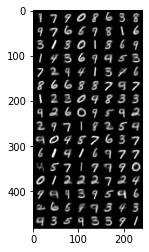

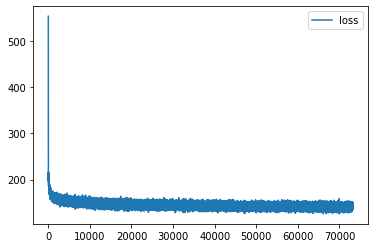

it: 73632; loss: 139.75291442871094 : : 469it [00:05, 93.63it/s]
it: 73633; loss: 137.3349609375 : : 0it [00:00, ?it/s]

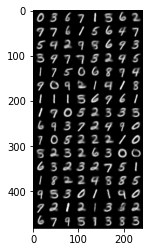

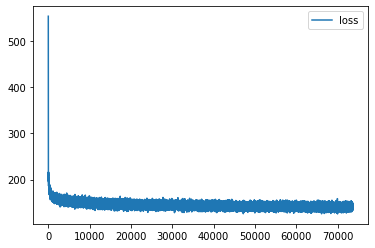

it: 74101; loss: 141.6139678955078 : : 469it [00:05, 92.48it/s] 
it: 74102; loss: 146.60061645507812 : : 0it [00:00, ?it/s]

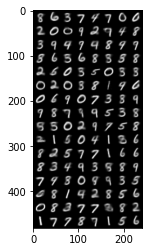

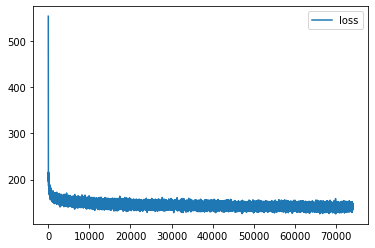

it: 74570; loss: 147.16688537597656 : : 469it [00:04, 93.87it/s]
it: 74571; loss: 142.66802978515625 : : 0it [00:00, ?it/s]

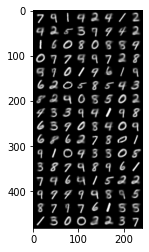

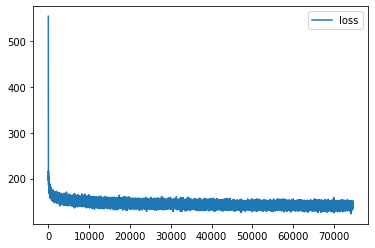

it: 75039; loss: 138.1715850830078 : : 469it [00:05, 93.37it/s] 
it: 75040; loss: 139.6365966796875 : : 0it [00:00, ?it/s]

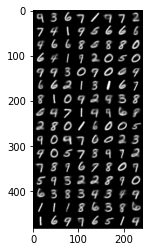

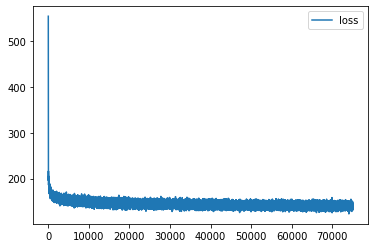

it: 75332; loss: 144.52833557128906 : : 293it [00:03, 91.06it/s]


TypeError: int() argument must be a string, a bytes-like object or a number, not 'Image'

In [147]:
beta1 = 0.9
beta2 = 0.999
lr = 0.001
nb_epochs = 200
display_freq = 1000
in_features = next(iter(dataloader))[0].flatten(start_dim = 1).shape[1]
latent_dim = 2 
layers = [512]
model = VAE(in_features,latent_dim = latent_dim,layers = layers).to(device)
vae_opt = torch.optim.Adam(model.parameters(), lr=lr, betas=(beta1, beta2))
loss_fn = nn.BCELoss(reduction="sum")

j = 0
kl_losses = []
reconstruction_losses = []
losses = []
for epoch in range(nb_epochs):
    pbar = tqdm(enumerate(dataloader))
    for i ,batch in pbar:
        im, _ = batch
        im = im.to(device)
        
        cur_batch, channel, width, hidth = im.shape
        
        im_reconstructed, im, mu, logsigma = model(im)

        kl_penality = -0.5 * torch.mean(torch.sum(1 + logsigma - mu.pow(2) - logsigma.exp(),dim = 1)) 
        reconstruction_loss = loss_fn(im_reconstructed, im) / cur_batch
        loss = (reconstruction_loss + kl_penality)
        
        #kl_losses.append(kl_penality.item())
        #reconstruction_losses.append(reconstruction_loss.item())
        losses.append(loss.item())
        
        vae_opt.zero_grad()
        loss.backward()
        vae_opt.step()
        
        
        pbar.set_description(f"it: {j}; loss: {loss} ")
        
        
        if i%display_freq == 0:
            im_reconstructed = im_reconstructed.view(cur_batch, channel, width, hidth)
            img = make_grid(im_reconstructed, padding=2, normalize=True)
            plt.imshow(transforms.ToPILImage()(img))
            plt.show()
        
            #plt.plot(range(len(kl_losses)), kl_losses, label = "kl_penality")
            #plt.plot(range(len(reconstruction_losses)), reconstruction_losses, label = "reconstruction_loss")
            
            plt.plot(range(len(losses)), losses, label = "loss")
            
            plt.legend()
            plt.show()
        j += 1

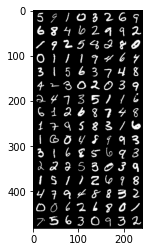

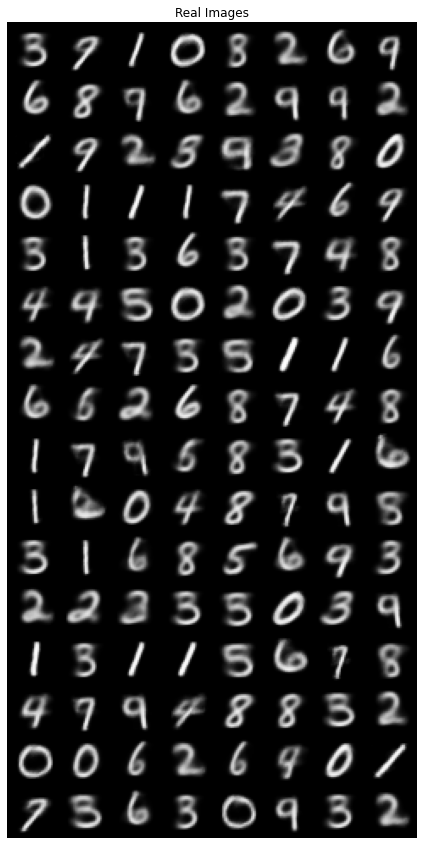

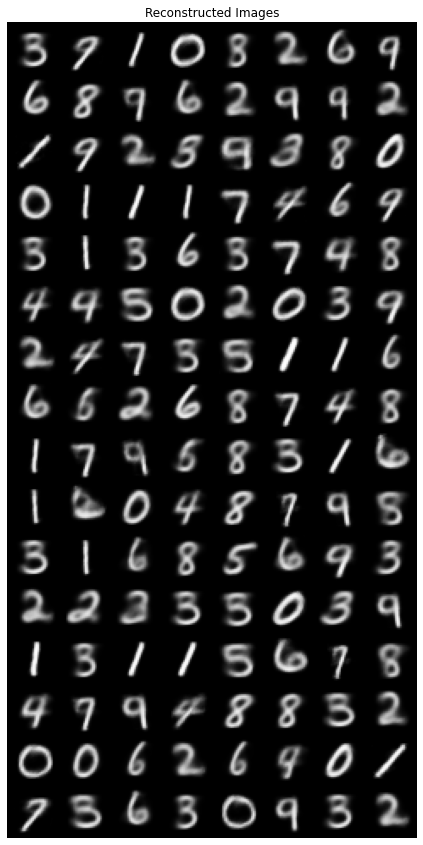

In [148]:
real_batch, _ = next(iter(dataloader))
im = real_batch.to(device)
cur_batch, channel, width, hidth = im.shape
################################################################################
im_reconstructed, _, mu, logsigma = model(im)
im_reconstructed = im_reconstructed.view(cur_batch, channel, width, hidth)
img = make_grid(im, padding=2, normalize=True)
plt.imshow(transforms.ToPILImage()(img))
plt.figure(figsize=(15,15))
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(img.cpu(),(1,2,0)))
plt.savefig( "./real_Images.png" )
################################################################################
img = make_grid(im_reconstructed, padding=2, normalize=True)
plt.imshow(transforms.ToPILImage()(img))
plt.figure(figsize=(15,15))
plt.axis("off")
plt.title("Reconstructed Images")
plt.imshow(np.transpose(img.cpu(),(1,2,0)))
plt.savefig( "./reconstructed_Images.png" )
